In [ ]:
import sys
sys.path.append('..')
from economic_brazil.coleta_dados.economic_data_brazil import EconomicBrazil
from economic_brazil.processando_dados.tratando_dados import TratandoDados
from economic_brazil.treinamento.treinamento_algoritimos import TreinandoModelos
import warnings
import pandas as pd
import pickle
import os

path_codigos_rodando = os.path.join(os.getcwd())

warnings.filterwarnings("ignore", category=UserWarning)

banco_central_codes = {
    "indice_condicoes_economicas": 4394,
    "indice_valores_garantias_imoveis_residencias_financiados": 21340,
    "venda_veiculos_concessionarias": 1378,
    "indicador_movimento_comercio_prazo": 1453,
    "indice_volume_vendas_varejo": 1455,
    "imposto_sobre_produtos": 22098,
    'metas_inflacao': 13521,
    'indice_expectativas_futuras': 4395,
    'indice_confianca_empresarial_industrial': 7343

}

variaveis_ibge = {
    "ipca": {
        "codigo": '1737',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "63",
    },
    "custo_m2": {
        "codigo": '2296',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "1198",
    },
    "pmc_volume": {
        "codigo": '8186',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "11709",
    },
    "producao_fisica_industrial": {
        "codigo": '8159',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "11599",},

    "producao_fisica_para_construcao_civil": {
        "codigo": '7980',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "11599",},
    
    "producao_soja_milho": {    
        "codigo": '6588',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "35",},
    
    "precos_construcao_civil": {
        "codigo": '2296',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "1198",},
    
    "volume_servicos_(pms)": {
        "codigo": '8162',
        "territorial_level": "1",
        "ibge_territorial_code": "all",
        "variable": "11621",
    }
    
    
}

codigos_ipeadata_padrao = {
    "rendimento_real_medio": "PNADC12_RRTH12",
    "pessoas_forca_trabalho": "PNADC12_FT12",
    "taxa_desocupacao": "PNADC12_TDESOC12",
    "caged_novo": "CAGED12_SALDON12",
    "caged_antigo": "CAGED12_SALDO12",
    'ibovespa': 'ANBIMA12_IBVSP12',
    "taja_juros_ltn": "ANBIMA12_TJTLN1212",
    'exportacoes': 'PAN12_XTV12',
    'importacoes': 'PAN12_MTV12',
    'm_1': 'BM12_M1MN12',
    'taxa_cambio': 'PAN12_ERV12',
    'atividade_economica': 'SGS12_IBCBR12',
}

lista = ['seguro desemprego', 
         'empregos',
         'FGTS',
         'INSS']

indicadores_ibge_link = {
    "pib": "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5932.xlsx&terr=N&rank=-&query=t/5932/n1/all/v/6564/p/all/c11255/90707/d/v6564%201/l/v,p,t%2Bc11255&verUFs=false&verComplementos2=false&verComplementos1=false&omitirIndentacao=false&abreviarRotulos=false&exibirNotas=false&agruparNoCabecalho=false",
    "despesas_publica": "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5932.xlsx&terr=N&rank=-&query=t/5932/n1/all/v/6561/p/all/c11255/93405/d/v6561%201/l/v,p%2Bc11255,t",
    "capital_fixo": "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela5932.xlsx&terr=N&rank=-&query=t/5932/n1/all/v/6561/p/all/c11255/93406/d/v6561%201/l/v,p%2Bc11255,t",
    "producao_industrial_manufatureira": "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela8158.xlsx&terr=N&rank=-&query=t/8158/n1/all/v/11599/p/all/c543/129278/d/v11599%205/l/v,p%2Bc543,t",
    'soja' :'https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela6588.xlsx&terr=N&rank=-&query=t/6588/n1/all/v/35/p/all/c48/0,39443/l/v,p%2Bc48,t',
    'milho_1' :'https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela6588.xlsx&terr=N&rank=-&query=t/6588/n1/all/v/35/p/all/c48/0,39441/l/v,p%2Bc48,t',
    'milho_2' :'https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela6588.xlsx&terr=N&rank=-&query=t/6588/n1/all/v/35/p/all/c48/0,39442/l/v,p%2Bc48,t',
    'pms': 'https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela8162.xlsx&terr=N&rank=-&query=t/8162/n1/all/v/11622/p/all/c11046/56726/c12355/107071/d/v11622%205/l/v,p%2Bc11046,t%2Bc12355'
}

codigos_fred = {'nasdaq100':'NASDAQ100',
                'taxa_cambio_efetiva':'RBBRBIS',
                'cboe_nasdaq':'VXNCLS',
                'taxa_juros_interbancaria':'IRSTCI01BRM156N',
                'atividade_economica_eua':'USPHCI',
                'indice_confianca_manufatura':'BSCICP03BRM665S',
                'indice_confianca_exportadores':'BSXRLV02BRM086S',
                'indice_tendencia_emprego':'BRABREMFT02STSAM',
                'indice_confianca_consumidor':'CSCICP03BRM665S',
                'capacidade_instalada':'BSCURT02BRM160S',}

############################################################################## VARIAVEL PREDICAO ################################################################
variavel_predicao = 'pib'


################################################################################ DADOS ############################################################################

dados_bcb = True
dados_ibge = True
dados_expectativas_inflacao = False
dados_metas_inflacao = False
dados_ibge_link = True
dados_ipeadata = True
dados_google_trends = True
dados_fred =True

economic_brasil = EconomicBrazil(codigos_banco_central=banco_central_codes, 
                       codigos_ibge=variaveis_ibge,
                       codigos_ipeadata=codigos_ipeadata_padrao,
                       lista_termos_google_trends=lista,
                       codigos_ibge_link=indicadores_ibge_link,
                       codigos_fred=codigos_fred,
                       data_inicio="1997-01-01")

dados = economic_brasil.dados_brazil(
                dados_bcb=dados_bcb,
                dados_ipeadata=dados_ipeadata,
                dados_fred=dados_fred,
                dados_google_trends=dados_google_trends,
                dados_expectativas_inflacao=dados_expectativas_inflacao,
                dados_ibge_link=dados_ibge_link,
                dados_ibge_codigos=dados_ibge,
    
)
#Colcando os dados em trimestre
dados_trimestral = dados.resample('QS').median()

############################################################################## TRATAMENTO ############################################################################


tratando_scaler = True
tratando_pca = True
tratando_dummy_covid = True
tratando_defasagens = True
tratando_datas = True
tratando_estacionaridade = True

data_divisao = '2020-06-01'

tratando = TratandoDados(dados_trimestral,
                         coluna_label=variavel_predicao,
                         data_divisao=data_divisao,
                         n_components=10,
                         numero_defasagens=4)

x_treino, x_teste, y_treino, y_teste,pca, scaler = tratando.tratando_dados(scaler=tratando_scaler, 
                                                                           pca=tratando_pca, 
                                                                           covid=tratando_dummy_covid, 
                                                                           datas=tratando_datas, 
                                                                           defasagens=tratando_defasagens, 
                                                                           estacionaridade=tratando_estacionaridade,
                                                                           )

data_divisao_treino_teste = tratando.data_divisao_treino_teste()
from sklearn.preprocessing import StandardScaler
stard_y = StandardScaler()
stard_y.fit(y_treino.reshape(-1,1))
y_treino = stard_y.transform(y_treino.reshape(-1,1)).flatten()
y_teste = stard_y.transform(y_teste.reshape(-1,1)).flatten()


param_grid_gradiente = {
                    "n_estimators": [2, 10,20,30, 50, 100, 200, 300, 500],
                    "learning_rate": [0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1, 1.25, 1.5,1.75],
                    "max_depth": [1, 3, 5, 7, 9],
                }

param_grid_xgboost = {
                    "n_estimators": [2, 10,20,30, 50, 100, 200, 300, 500],
                    "learning_rate": [0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1, 1.25, 1.5,1.75],
                    "max_depth": [1, 3, 5, 7, 9],
                }

param_grid_catboost = {
                    "iterations": [2, 10,20,30, 50, 100, 200, 300, 500],
                    "learning_rate": [0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
                    "depth": [1, 3, 5, 7, 9,10,15],
                }


tuning = TreinandoModelos(x_treino, 
                          y_treino, 
                          x_teste, 
                          y_teste,
                          numero_divisoes = 5,
                          diretorio=f'../codigos_rodando/modelos_salvos/modelos_{variavel_predicao}/',
                          salvar_modelo=True)

modelo_redes_neurais = True
modelo_cast = True
modelo_sarimax = False
modelo_gradient_boosting = True
modelo_regresao_linear = True
modelo_xgboost = True
redes_neurais_tuning = False

modelos_tunning = tuning.treinar_modelos(redes_neurais=modelo_redes_neurais,
                                         cat_boost=modelo_cast,
                                         sarimax=modelo_sarimax,
                                         gradiente_boosting=modelo_gradient_boosting,
                                         regressao_linear=modelo_regresao_linear,
                                         xg_boost=modelo_xgboost,
                                         redes_neurais_tuning=redes_neurais_tuning,
                                         param_grid_catboost=param_grid_catboost,
                                        param_grid_xgboost=param_grid_xgboost,
                                        param_grid_gradiente=param_grid_gradiente,
                                         )



In [87]:
import sys
sys.path.append('..')
from economic_brazil.treinamento.treinamento_algoritimos import carregar
from economic_brazil.analisando_modelos.analise_modelos_regressao import MetricasModelosDicionario,PredicaosModelos
from economic_brazil.analisando_modelos.regressao_conformal import ConformalRegressionPlotter
from economic_brazil.predicao_valores_futuros import KerasTrainedRegressor, Predicao
import pandas as pd
from joblib import parallel_config
import warnings
import pickle
import os
warnings.filterwarnings("ignore", category=UserWarning)
path_codigos_rodando = os.path.join(os.getcwd())

##########################################################################################################DEFININDO VARIAVEIS############################################################################################################

variavel_predicao = 'ipca'

##########################################################################################CARREGANDO DADOS############################################################################################################

arquivo_pib = path_codigos_rodando+f'/avaliacao_modelos/apresentacao_streamlit/dados_treinamento_{variavel_predicao}.pkl'
dados_carregados = pickle.load(open(arquivo_pib, 'rb'))

dados = dados_carregados['dados']
x_treino = dados_carregados['x_treino']
x_teste = dados_carregados['x_teste']
y_treino = dados_carregados['y_treino']
y_teste = dados_carregados['y_teste']
if 'pca' in dados_carregados.keys():
    pca = dados_carregados['pca']
if 'scaler' in dados_carregados.keys():    
    scaler = dados_carregados['scaler']
data_divisao_treino_teste = dados_carregados['data_divisao_treino_teste']
tratando = dados_carregados['tratando']

##########################################################################################################CARREGANDO MODELOS############################################################################################################

modelos_carregados = carregar(diretorio=path_codigos_rodando+f'/modelos_salvos/modelos_{variavel_predicao}/',gradiente_boosting=True, xg_boost=True, cat_boost=True, regressao_linear=True, redes_neurais=True, sarimax=False)


##########################################################################################################PREVENDO OS DADOS DE TREINO E TESTE################################################################################
predi = PredicaosModelos(modelos_carregados, x_treino, y_treino, x_teste, y_teste)
predicoes_treino, predicoes_teste = predi.predicoes()
x_treino, y_treino, x_teste, y_teste, x_treino_recorrente, y_treino_recorrente, x_teste_recorrente, y_teste_recorrente = predi.return_dados()

###########################################################################################################################CALCULANDO METRICAS################################################################################
metri = MetricasModelosDicionario()
metrica_teste = metri.calculando_metricas(predicoes_teste, y_teste, y_teste_recorrente)
metrica_treino = metri.calculando_metricas(predicoes_treino, y_treino, y_treino_recorrente)

print(metrica_teste)
print(metrica_treino)

#metrica_teste.to_csv("/workspaces/Predicoes_macroeconomicas/codigos_rodando/avaliacao_modelos/metricas_teste.csv")
#metrica_treino.to_csv("/workspaces/Predicoes_macroeconomicas/codigos_rodando/avaliacao_modelos/metricas_treino.csv")

index_treino = dados[dados.index <= data_divisao_treino_teste][6:].index
index_teste = dados[dados.index > data_divisao_treino_teste][4:].index

#############################################################################################################PLOTANDO METRICAS################################################################################

################################################################################################AVALIANDO MODELOS################################################################################
modelos_validos_teste = metrica_teste[metrica_teste['Variance'] > 0.1]

"""if modelos_validos_teste.empty:
    # Calcular a diferença absoluta entre métricas de treino e teste
    metrica_treino = metrica_treino.reindex(metrica_teste.index)
    metricas_diferenca = pd.DataFrame(index=metrica_treino.index)
    metricas_diferenca['MAE_diff'] =abs(metrica_treino['MAE'] - metrica_teste['MAE'])
    metricas_diferenca['MSE_diff'] = abs(metrica_treino['MSE'] - metrica_teste['MSE'])
    metricas_diferenca['RMSE_diff'] = abs(metrica_treino['RMSE'] - metrica_teste['RMSE'])

    # Calcular a soma das diferenças
    metricas_diferenca['total_diff'] = (metricas_diferenca['MAE_diff'] +
                                        metricas_diferenca['MSE_diff'] +
                                        metricas_diferenca['RMSE_diff'])
    # Selecionar o modelo com a menor soma das diferenças
    melhor_modelo = metricas_diferenca['total_diff'].idxmin()
    menor_diferenca = metricas_diferenca['total_diff'].min()

    print(f'Melhor modelo baseado na menor diferença entre treino e teste, com valor de {menor_diferenca}:', melhor_modelo)
else:
    melhor_modelo = modelos_validos_teste['MAE'].idxmin()
    print(f'Melhor modelo baseado na MAE mais baixo, com valor de {metrica_teste["MAE"].min()}:',melhor_modelo)"""
# Calcular a diferença absoluta entre métricas de treino e teste
metrica_treino = metrica_treino.reindex(metrica_teste.index)
metricas_diferenca = pd.DataFrame(index=metrica_treino.index)
metricas_diferenca['MAE_diff'] =abs(metrica_treino['MAE'] - metrica_teste['MAE'])
metricas_diferenca['MSE_diff'] = abs(metrica_treino['MSE'] - metrica_teste['MSE'])
metricas_diferenca['RMSE_diff'] = abs(metrica_treino['RMSE'] - metrica_teste['RMSE'])

# Calcular a soma das diferenças
metricas_diferenca['total_diff'] = (metricas_diferenca['MAE_diff'] +
                                    metricas_diferenca['MSE_diff'] +
                                    metricas_diferenca['RMSE_diff'])
# Selecionar o modelo com a menor soma das diferenças
melhor_modelo = metricas_diferenca['total_diff'].idxmin()
menor_diferenca = metricas_diferenca['total_diff'].min()

print(f'Melhor modelo baseado na menor diferença entre treino e teste, com valor de {menor_diferenca}:', melhor_modelo)
print(metricas_diferenca)

#Conformal
index_treino_conformal = dados[dados.index <= data_divisao_treino_teste].index
index_teste_conformal = dados[dados.index > data_divisao_treino_teste].index

with parallel_config(backend='threading', n_jobs=2):
    if melhor_modelo == 'redes_neurais':
        conformal = ConformalRegressionPlotter(KerasTrainedRegressor(modelos_carregados[melhor_modelo]), x_treino_recorrente, x_teste_recorrente, y_treino[1:], y_teste[1:])
        y_pred, y_pis, _,_ = conformal.regressao_conformal()
        conformal.plot_prediction_intervals(index_train=index_treino_conformal, index_test=index_teste_conformal,title=f'Predição Intervals {melhor_modelo}',save=True,diretorio=path_codigos_rodando+f'/avaliacao_modelos/regressao_conforma_teste_{variavel_predicao}.png')
    else:
        conformal = ConformalRegressionPlotter(modelos_carregados[melhor_modelo], x_treino, x_teste, y_treino, y_teste)
        y_pred, y_pis, _,_ = conformal.regressao_conformal()
        conformal.plot_prediction_intervals(index_train=index_treino_conformal, index_test=index_teste_conformal,title=f'Predição Intervals {melhor_modelo}',save=True,diretorio=path_codigos_rodando+f'/avaliacao_modelos/regressao_conforma_teste_{variavel_predicao}.png')

dados_corformal = {
    'data': index_teste[-1],
    'predicao': y_pred,
    'intervalo_lower': y_pis.squeeze()[0:,0],
    'intervalo_upper': y_pis.squeeze()[0:,1],}    
## Predicao futuro
with parallel_config(backend='threading', n_jobs=2):
    predicao = Predicao(x_treino,y_treino,tratando,dados,melhor_modelo,modelos_carregados[melhor_modelo],periodo='Trimestral',coluna=variavel_predicao)
    
dados_predicao_futuro, _, index_futuro = predicao.criando_dados_futuros()
dados_predicao = predicao.criando_dataframe_predicoes()
#dados_predicao.to_csv('/workspaces/Predicoes_macroeconomicas/codigos_rodando/avaliacao_modelos/dados_predicao.csv',index=False)
print(dados_predicao)
data_predicao,intervalo_lower,intervalo_upper,predicao_proximo_mes = predicao.predicao_ultimo_periodo()
dados_futuro = {
    'data': data_predicao,
    'intervalo_lower': intervalo_lower,
    'intervalo_upper': intervalo_upper,
    'predicao': predicao_proximo_mes}
print(f'Data da predição:{data_predicao}, Valor da predição:{predicao_proximo_mes}, Intervalo de predição [lower,upper] :{intervalo_lower,intervalo_upper}')
predicao.plotando_predicoes(save=True,diretorio=path_codigos_rodando+f'/avaliacao_modelos/predicao_futuro_{variavel_predicao}.png')

###salvando os dados
"""dados_salvos = {}
dados_salvos['dados'] = dados
dados_salvos['y_treino'] = stard_y.inverse_transform(y_treino.reshape(-1,1)).flatten()
dados_salvos['x_treino'] = x_treino
dados_salvos['y_treino_recorrente'] = stard_y.inverse_transform(y_treino_recorrente.reshape(-1,1)).flatten()
dados_salvos['x_treino_recorrente'] = x_treino_recorrente
dados_salvos['x_teste'] = x_teste
dados_salvos['y_teste'] = stard_y.inverse_transform(y_teste.reshape(-1,1)).flatten()
dados_salvos['y_teste_recorrente'] = stard_y.inverse_transform(y_teste_recorrente.reshape(-1,1)).flatten()
dados_salvos['x_teste_recorrente'] = x_teste_recorrente
dados_salvos['metrica_teste'] = metrica_teste
dados_salvos['metrica_treino'] = metrica_treino
dados_salvos['predicoes_treino'] = predicoes_treino
dados_salvos['predicoes_teste'] = predicoes_teste
dados_salvos['index_treino'] = index_treino
dados_salvos['index_teste'] = index_teste
dados_salvos['melhor_modelo'] = melhor_modelo
dados_salvos['dados_conformal'] = dados_corformal
dados_salvos['dados_predicao'] = dados_predicao
dados_salvos['dados_futuro'] = dados_futuro
dados_salvos['modelos_carregados'] = list(modelos_carregados.keys())

with open(path_codigos_rodando+f'/avaliacao_modelos/apresentacao_streamlit/dados_salvos_{variavel_predicao}.pkl', 'wb') as f:
    pickle.dump(dados_salvos, f)
    
print('Avaliacao concluida com sucesso!')"""


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
                     MAE    MSE  RMSE     R²  Variance
xg_boost            0.55   0.42  0.65  -1.12      0.00
gradiente_boosting  0.57   0.44  0.66  -1.24      0.00
cat_boost           0.65   0.55  0.74  -1.78      0.00
redes_neurais       1.31   1.97  1.40  -8.86      0.07
regressao_linear    3.73  14.25  3.77 -71.10      0.31
                     MAE   MSE  RMSE    R²  Variance
xg_boost            0.48  0.38  0.61 -1.46      0.04
gradiente_boosting  0.50  0.38  0.62 -1.51      0.00
cat_boost           0.56  0.46  0.68 -2.04      0.07
regressao_linear    0.63  0.66  0.81 -3.34      0.30
redes_neurais       0.74  0.98  0.99 -5.41      0.55
Melhor modelo baseado na menor diferença entre treino e teste, com valor de 0.15000000000000008: xg_boost
                    MAE_diff  MSE_diff  RMSE_diff  total_diff
xg_boost                0.07      0.04       0.04        0.15
gradiente_boosting      0.07      0.06       0

"dados_salvos = {}\ndados_salvos['dados'] = dados\ndados_salvos['y_treino'] = stard_y.inverse_transform(y_treino.reshape(-1,1)).flatten()\ndados_salvos['x_treino'] = x_treino\ndados_salvos['y_treino_recorrente'] = stard_y.inverse_transform(y_treino_recorrente.reshape(-1,1)).flatten()\ndados_salvos['x_treino_recorrente'] = x_treino_recorrente\ndados_salvos['x_teste'] = x_teste\ndados_salvos['y_teste'] = stard_y.inverse_transform(y_teste.reshape(-1,1)).flatten()\ndados_salvos['y_teste_recorrente'] = stard_y.inverse_transform(y_teste_recorrente.reshape(-1,1)).flatten()\ndados_salvos['x_teste_recorrente'] = x_teste_recorrente\ndados_salvos['metrica_teste'] = metrica_teste\ndados_salvos['metrica_treino'] = metrica_treino\ndados_salvos['predicoes_treino'] = predicoes_treino\ndados_salvos['predicoes_teste'] = predicoes_teste\ndados_salvos['index_treino'] = index_treino\ndados_salvos['index_teste'] = index_teste\ndados_salvos['melhor_modelo'] = melhor_modelo\ndados_salvos['dados_conformal'] = 

In [91]:
metrica_treino,metrica_teste

(                     MAE   MSE  RMSE    R²  Variance
 xg_boost            0.48  0.38  0.61 -1.46      0.04
 gradiente_boosting  0.50  0.38  0.62 -1.51      0.00
 cat_boost           0.56  0.46  0.68 -2.04      0.07
 redes_neurais       0.74  0.98  0.99 -5.41      0.55
 regressao_linear    0.63  0.66  0.81 -3.34      0.30,
                      MAE    MSE  RMSE     R²  Variance
 xg_boost            0.55   0.42  0.65  -1.12      0.00
 gradiente_boosting  0.57   0.44  0.66  -1.24      0.00
 cat_boost           0.65   0.55  0.74  -1.78      0.00
 redes_neurais       1.31   1.97  1.40  -8.86      0.07
 regressao_linear    3.73  14.25  3.77 -71.10      0.31)

In [88]:
metrica_treino = metrica_treino.reindex(metrica_teste.index)
metricas_diferenca = pd.DataFrame(index=metrica_treino.index)
metricas_diferenca['MAE_diff'] = abs(metrica_treino['MAE'] - metrica_teste['MAE'])
metricas_diferenca['MSE_diff'] = abs(metrica_treino['MSE'] - metrica_teste['MSE'])
metricas_diferenca['RMSE_diff'] = abs(metrica_treino['RMSE'] - metrica_teste['RMSE'])
metricas_diferenca['total_diff'] = (metricas_diferenca['MAE_diff'] +
                                    metricas_diferenca['MSE_diff'] +
                                    metricas_diferenca['RMSE_diff'])
metricas_diferenca

,MAE_diff,MSE_diff,RMSE_diff,total_diff
xg_boost,0.07,0.04,0.04,0.15
gradiente_boosting,0.07,0.06,0.04,0.17
cat_boost,0.09,0.09,0.06,0.24
redes_neurais,0.57,0.99,0.41,1.97
regressao_linear,3.10,13.59,2.96,19.65


In [79]:
# Calcular a diferença absoluta entre métricas de treino e teste
metrica_treino = metrica_treino.reindex(metrica_teste.index)
metricas_diferenca = pd.DataFrame(index=metrica_treino.index)
metricas_diferenca['MAE_diff'] =abs(metrica_treino['MAE'] - metrica_teste['MAE'])
metricas_diferenca['MSE_diff'] = abs(metrica_treino['MSE'] - metrica_teste['MSE'])
metricas_diferenca['RMSE_diff'] = abs(metrica_treino['RMSE'] - metrica_teste['RMSE'])

# Calcular a soma das diferenças
metricas_diferenca['total_diff'] = (metricas_diferenca['MAE_diff'] +
                                    metricas_diferenca['MSE_diff'] +
                                    metricas_diferenca['RMSE_diff'])
# Selecionar o modelo com a menor soma das diferenças
melhor_modelo = metricas_diferenca['total_diff'].idxmin()
menor_diferenca = metricas_diferenca['total_diff'].min()

print(f'Melhor modelo baseado na menor diferença entre treino e teste, com valor de {menor_diferenca}:', melhor_modelo)

Melhor modelo baseado na menor diferença entre treino e teste, com valor de 0.89: cat_boost


In [68]:
melhor_modelo

'cat_boost'

In [27]:
dados_corformal

{'data': Timestamp('2024-04-01 00:00:00'),
 'predicao': array([2.21994661, 2.05179797, 2.38192339, 2.43244058, 2.1559864 ,
        2.56144993, 2.10410511, 2.70842593, 2.63509176, 2.65656706,
        2.33720525]),
 'intervalo_lower': array([0.66081634, 0.44640548, 0.58959864, 0.87521891, 0.5684276 ,
        0.93500255, 0.40743079, 1.06459098, 0.99741179, 1.01692119,
        0.61077386]),
 'intervalo_upper': array([4.09566024, 3.86923208, 4.29924263, 4.1772525 , 3.92582728,
        4.27279518, 3.67270186, 4.20191343, 4.08975613, 4.14351331,
        3.79447013])}

In [88]:
print('shape treino:',index_treino.shape)
print('treino redes_neurais:',predicoes_treino['redes_neurais'].shape)
print('treino xg_boost:',predicoes_treino['xg_boost'].shape)
print('treino cat_boost:',predicoes_treino['cat_boost'].shape)
print('treino gradiente_boosting:',predicoes_treino['gradiente_boosting'].shape)
print('treino regressao_linear:',predicoes_treino['regressao_linear'].shape)
print('index_treino:',index_treino.shape)

print('teste')

print('index_teste:',index_teste[1:].shape)
print('teste redes_neurais:',predicoes_teste['redes_neurais'].shape)
print('teste xg_boost:',predicoes_teste['xg_boost'].shape)
print('teste cat_boost:',predicoes_teste['cat_boost'].shape)
print('teste gradiente_boosting:',predicoes_teste['gradiente_boosting'].shape)
print('teste regressao_linear:',predicoes_teste['regressao_linear'].shape)


shape treino: (240,)
treino redes_neurais: (239,)
treino xg_boost: (240,)
treino cat_boost: (240,)
treino gradiente_boosting: (240,)
treino regressao_linear: (240,)
index_treino: (240,)
teste
index_teste: (43,)
teste redes_neurais: (43,)
teste xg_boost: (44,)
teste cat_boost: (44,)
teste gradiente_boosting: (44,)
teste regressao_linear: (44,)


In [45]:
predicoes_teste['regressao_linear'].flatten()

array([0.88709997, 0.90433023, 1.22764761, 1.24660884, 0.60702099,
       1.5494946 , 0.96175387, 1.78621825, 1.32672474, 1.59994255,
       1.39599493])

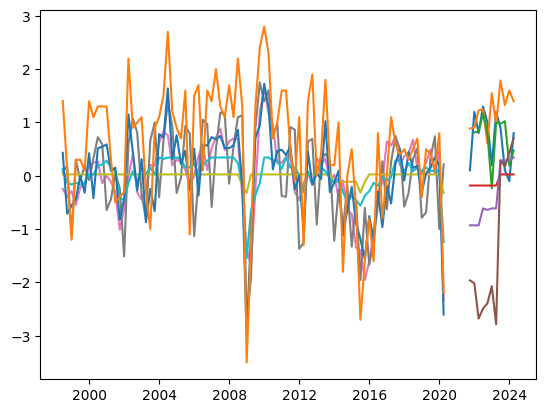

In [40]:
import matplotlib.pyplot as plt
plt.plot(index_teste[1:],y_teste)
plt.plot(index_teste[1:],predicoes_teste['regressao_linear'])
plt.plot(index_teste[2:],predicoes_teste['redes_neurais'])
plt.plot(index_teste[1:],predicoes_teste['xg_boost'])
plt.plot(index_teste[1:],predicoes_teste['cat_boost'])
plt.plot(index_teste[1:],predicoes_teste['gradiente_boosting'])
plt.plot(index_treino,predicoes_treino['regressao_linear'][1:])
plt.plot(index_treino,predicoes_treino['redes_neurais'])
plt.plot(index_treino,predicoes_treino['xg_boost'][1:])
plt.plot(index_treino,predicoes_treino['cat_boost'][1:])
plt.plot(index_treino,predicoes_treino['gradiente_boosting'][1:])
plt.plot(index_treino,y_treino[1:])

In [10]:
index_teste

DatetimeIndex(['2021-07-01', '2021-10-01', '2022-01-01', '2022-04-01',
               '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01',
               '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [47]:
from sklearn.preprocessing import StandardScaler
stard_teste = StandardScaler()
stard_teste.fit(y_treino.reshape(-1,1))
y_teste_scaler = stard_teste.transform(y_treino.reshape(-1,1))
y_treino_scaler = stard_teste.transform(y_teste.reshape(-1,1))

In [70]:
x_teste_recorrente.reshape(x_teste_recorrente.shape[0], -1)

array([[ -3.2335495 ,  -6.69118797,   2.87517896,   7.64587337,
        -14.36502223,   0.1426145 , -10.28603803,   4.49066509,
          7.95176075,  -8.54103411],
       [ -2.02733107,   1.98486861,  -5.88828444,   3.07129554,
        -15.78240431,   4.69653165, -15.74070341,   4.83202621,
          4.50664952,  -5.45664402],
       [  7.84640409,  -0.7039319 ,   3.30978297,   3.82999374,
        -20.93294595,   0.0903522 , -13.79452232,   3.8617578 ,
          0.74017261,  -0.63611149],
       [  4.07623894,  -8.77547406,  -4.35967491,  -3.73229876,
        -13.63810805,   3.73179739, -15.0691517 ,   8.15697175,
          1.18773698,  -0.41926167],
       [ -4.10172809,  -3.7359965 ,   7.6203245 ,   0.42295852,
        -11.23714907,   4.04199432, -10.80530506,   5.41662463,
          1.01478834,   2.12409417],
       [ -1.5450747 ,   4.05502185,  -3.61580231,  -3.65949597,
        -13.94341195,  -2.068334  ,  -5.40811508,   1.09181882,
          0.7310059 ,   0.30714324],
       [ 1

In [69]:
x_teste

array([[ -3.2335495 ,  -6.69118797,   2.87517896,   7.64587337,
        -14.36502223,   0.1426145 , -10.28603803,   4.49066509,
          7.95176075,  -8.54103411],
       [ -2.02733107,   1.98486861,  -5.88828444,   3.07129554,
        -15.78240431,   4.69653165, -15.74070341,   4.83202621,
          4.50664952,  -5.45664402],
       [  7.84640409,  -0.7039319 ,   3.30978297,   3.82999374,
        -20.93294595,   0.0903522 , -13.79452232,   3.8617578 ,
          0.74017261,  -0.63611149],
       [  4.07623894,  -8.77547406,  -4.35967491,  -3.73229876,
        -13.63810805,   3.73179739, -15.0691517 ,   8.15697175,
          1.18773698,  -0.41926167],
       [ -4.10172809,  -3.7359965 ,   7.6203245 ,   0.42295852,
        -11.23714907,   4.04199432, -10.80530506,   5.41662463,
          1.01478834,   2.12409417],
       [ -1.5450747 ,   4.05502185,  -3.61580231,  -3.65949597,
        -13.94341195,  -2.068334  ,  -5.40811508,   1.09181882,
          0.7310059 ,   0.30714324],
       [ 1

In [62]:
x_teste_recorrente.flatten().reshape(10,-1)

array([[ -3.2335495 ,  -6.69118797,   2.87517896,   7.64587337,
        -14.36502223,   0.1426145 , -10.28603803,   4.49066509,
          7.95176075,  -8.54103411],
       [ -2.02733107,   1.98486861,  -5.88828444,   3.07129554,
        -15.78240431,   4.69653165, -15.74070341,   4.83202621,
          4.50664952,  -5.45664402],
       [  7.84640409,  -0.7039319 ,   3.30978297,   3.82999374,
        -20.93294595,   0.0903522 , -13.79452232,   3.8617578 ,
          0.74017261,  -0.63611149],
       [  4.07623894,  -8.77547406,  -4.35967491,  -3.73229876,
        -13.63810805,   3.73179739, -15.0691517 ,   8.15697175,
          1.18773698,  -0.41926167],
       [ -4.10172809,  -3.7359965 ,   7.6203245 ,   0.42295852,
        -11.23714907,   4.04199432, -10.80530506,   5.41662463,
          1.01478834,   2.12409417],
       [ -1.5450747 ,   4.05502185,  -3.61580231,  -3.65949597,
        -13.94341195,  -2.068334  ,  -5.40811508,   1.09181882,
          0.7310059 ,   0.30714324],
       [ 1

In [50]:
y_teste_scaler

array([[-1.93584202],
       [ 0.73920799],
       [-0.34753108],
       [-1.43427014],
       [-0.18034045],
       [-0.18034045],
       [-0.34753108],
       [ 0.73920799],
       [ 0.48842205],
       [ 0.65561268],
       [ 0.65561268],
       [ 0.65561268],
       [-0.18034045],
       [-0.84910295],
       [-0.76550764],
       [-0.68191233],
       [ 1.40797049],
       [ 0.32123143],
       [ 0.40482674],
       [ 0.48842205],
       [-0.68191233],
       [-1.26707951],
       [ 0.32123143],
       [ 0.48842205],
       [ 0.8228033 ],
       [ 1.82594705],
       [ 0.57201736],
       [ 0.32123143],
       [ 0.1540408 ],
       [ 0.90639861],
       [-1.35067483],
       [ 0.8228033 ],
       [ 0.98999393],
       [-0.34753108],
       [ 0.90639861],
       [ 0.73920799],
       [ 1.24077987],
       [ 0.65561268],
       [ 0.48842205],
       [ 0.98999393],
       [ 0.48842205],
       [ 1.40797049],
       [ 0.65561268],
       [-3.35696233],
       [-1.43427014],
       [ 0

In [3]:
stard_teste.inverse_transform(y_teste_recorrente.reshape(-1,1)).squeeze() 

array([1.95121752, 1.47272179, 2.07084145, 1.71196966, 0.7549782 ,
       1.95121752, 1.59234573, 0.63535427, 0.39610641, 1.47272179])

In [ ]:
stard_teste.inverse_transform(y_teste_scaler).squeeze()

array([[-1.8],
       [ 1.4],
       [ 0.1],
       [-1.2],
       [ 0.3],
       [ 0.3],
       [ 0.1],
       [ 1.4],
       [ 1.1],
       [ 1.3],
       [ 1.3],
       [ 1.3],
       [ 0.3],
       [-0.5],
       [-0.4],
       [-0.3],
       [ 2.2],
       [ 0.9],
       [ 1. ],
       [ 1.1],
       [-0.3],
       [-1. ],
       [ 0.9],
       [ 1.1],
       [ 1.5],
       [ 2.7],
       [ 1.2],
       [ 0.9],
       [ 0.7],
       [ 1.6],
       [-1.1],
       [ 1.5],
       [ 1.7],
       [ 0.1],
       [ 1.6],
       [ 1.4],
       [ 2. ],
       [ 1.3],
       [ 1.1],
       [ 1.7],
       [ 1.1],
       [ 2.2],
       [ 1.3],
       [-3.5],
       [-1.2],
       [ 1.3],
       [ 2.4],
       [ 2.8],
       [ 2.3],
       [ 0.7],
       [ 1. ],
       [ 1.6],
       [ 1.6],
       [ 0.5],
       [-0.1],
       [ 1.1],
       [-1.3],
       [ 1.4],
       [ 1.9],
       [ 0. ],
       [ 0.4],
       [ 1.8],
       [ 0.2],
       [ 0.2],
       [ 1. ],
       [-1.8],
       [ 0